In [2]:
import os
import numpy
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
data_matrix = numpy.ndarray(shape=(400, 10304), dtype=numpy.dtype('u1'))  # 8-bit unsigned int
label_vector = numpy.empty(shape=(400, 1), dtype=numpy.dtype('u1'))

i = 0
for dirname, _, filenames in os.walk('dataset'):
    for filename in filenames:
        image = Image.open(os.path.join(dirname, filename))
        numpy_image = numpy.asarray(image).flatten()
        data_matrix[i] = numpy_image.copy()
        label_vector[i] = int(dirname[dirname.rindex('\\') + 2:])
        i += 1

print(data_matrix)
print(data_matrix.shape)

[[ 48  49  45 ...  47  46  46]
 [ 34  34  33 ...  37  40  33]
 [ 60  60  62 ...  32  34  34]
 ...
 [112 109 116 ...  93  88  92]
 [111 114 112 ...  88  86  92]
 [110 112 113 ...  92  87  90]]
(400, 10304)


In [3]:
# Odd rows for training
train_data = data_matrix[::2, :]
y_train = label_vector[::2, :].reshape(train_data.shape[0], 1)

# Even rows for testing
test_data = data_matrix[1::2, :]
y_test = label_vector[1::2, :].reshape(train_data.shape[0], 1)

print(test_data)
print(test_data.shape)
print("\n")
print(train_data)
print(train_data.shape)

(200, 1)
[[ 34  34  33 ...  37  40  33]
 [ 39  44  53 ...  29  26  29]
 [ 64  76  80 ...  35  37  39]
 ...
 [110 109 111 ...  94  88  90]
 [112 109 116 ...  93  88  92]
 [110 112 113 ...  92  87  90]]
(200, 10304)


[[ 48  49  45 ...  47  46  46]
 [ 60  60  62 ...  32  34  34]
 [ 63  53  35 ...  41  10  24]
 ...
 [114 110 112 ...  93  89  86]
 [113 112 111 ...  87  87  89]
 [111 114 112 ...  88  86  92]]
(200, 10304)


In [7]:
# PCA
def PCA(D, alpha):
    mean = numpy.mean(D, axis=0).reshape(1, train_data.shape[1])
    centered_data = numpy.subtract(D, mean)
    cov_matrix = numpy.cov(centered_data, rowvar=False)
    eigen_values, eigen_vectors = numpy.linalg.eigh(cov_matrix)

    #sort the eigenvalues and eigenvectors in descending order
    sorted_index = numpy.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:, sorted_index]

    sum_eigenvalues = sorted_eigenvalue.sum()
    sum_reduced = sorted_eigenvalue[0]

    components = 1
    while (sum_reduced / sum_eigenvalues) < alpha:
        sum_reduced += sorted_eigenvalue[components]
        components += 1

    reduced_basis = sorted_eigenvectors[:, 0:components]

    return reduced_basis

In [8]:
U = PCA(train_data, 0.9)
# u1    u2  ... ur
print(U.shape)

(10304, 76)


In [9]:
X_train = numpy.matmul(train_data, U)
X_test = numpy.matmul(test_data, U)

print(X_train.shape)
print(X_test.shape)

(200, 76)
(200, 76)


In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

# Predict on dataset which model has not seen before
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.725


C:\ProgramData\Anaconda3\envs\FaceRecognition\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


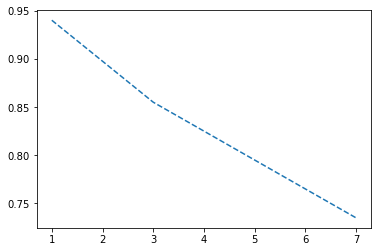

In [3]:
#                            ACCURACY
# 0.80 -> 36  eigenvector --> 0.94      K = 1
#                             0.855     K = 3
#                             0.8       K = 5
#                             0.765     K = 7


# 0.85 -> 52  eigenvector --> 0.94      K = 1
#                             0.855     K = 3
#                             0.795     K = 5
#                             0.735     K = 7

# 0.90 -> 76  eigenvector --> 0.94      K = 1
#                             0.85      K = 3
#                             0.78      K = 5
#                             0.725     K = 7

# 0.95 -> 115 eigenvector --> 0.93      K = 1
#                             0.85      K = 3
#                             0.775     K = 5
#                             0.7       K = 7

# for alpha = 0.85
plt.plot([1, 3, 5, 7], [0.94, 0.855, 0.795, 0.735], linestyle='dashed')
plt.show()

# can't find a relation between alpha and accuracy , above a certain threshold accuracy doesnt change